In [1]:
## Taken from https://github.com/alberduris/SirajsCodingChallenges/tree/master/Stock%20Market%20Prediction


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [62]:
import os
print(os.getcwd())
os.chdir('C:\\Users\\G560667\\stock-trader\\')
print(os.getcwd())

C:\Users\G560667\stock-trader
C:\Users\G560667\stock-trader


In [3]:
import tensorflow as tf
#from tensorflow.contrib import rnn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
dataset = pd.read_csv('PNB_Processed.csv')
dataset.head(2)

,Close,CloseTarget,MACD,Stochastics,ATR
0,37.4,38.6,0.000000,0.0,5.0
1,38.6,40.1,0.012753,0.0,1.7


In [83]:
## Normalize

dataset = (dataset - dataset.mean()) / (dataset.max() - dataset.min())
dataset.head(2)

,Close,CloseTarget,MACD,Stochastics,ATR
0,-0.343461,-0.342659,0.000011,-0.528858,-0.016402
1,-0.342571,-0.341546,0.000077,-0.528858,-0.020219


In [6]:
##Hyper Params

In [76]:
num_epochs = 200

batch_size = 1

total_series_length = len(dataset.index)

truncated_backprop_length = 3 #The size of the sequence

state_size = 12 #The number of neurons

num_features = 4
num_classes = 1 #[1,0]

num_batches = total_series_length//batch_size//truncated_backprop_length

min_test_size = 100

print('The total series length is: %d' %total_series_length)
print('The current configuration gives us %d batches of %d observations each one looking %d steps in the past' 
      %(num_batches,batch_size,truncated_backprop_length))

The total series length is: 3915
The current configuration gives us 1305 batches of 1 observations each one looking 3 steps in the past


In [35]:
## Train-Test split

In [66]:
datasetTrain = dataset[dataset.index < num_batches*batch_size*truncated_backprop_length]


for i in range(min_test_size,len(dataset.index)):
    
    if(i % truncated_backprop_length*batch_size == 0):
        test_first_idx = len(dataset.index)-i
        break

datasetTest =  dataset[dataset.index >= test_first_idx]

In [37]:
datasetTrain.head(2)

,Close,CloseTarget,MACD,Stochastics,ATR
0,-0.343523,-0.342659,0.000011,-0.528783,-0.016407
1,-0.342633,-0.341546,0.000077,-0.528783,-0.020224


In [38]:
datasetTest.head(2)

,Close,CloseTarget,MACD,Stochastics,ATR
3812,-0.267165,-0.265077,-0.01230,-0.528783,-0.01392
3813,-0.265051,-0.261850,-0.01302,-0.398943,-0.01820


In [67]:
xTrain = datasetTrain[['Close','MACD','Stochastics','ATR']].as_matrix()
yTrain = datasetTrain['CloseTarget'].as_matrix()

In [68]:
print(xTrain[0:3],'\n',yTrain[0:3])

[[ -3.43461035e-01   1.11801894e-05  -5.28857916e-01  -1.64023907e-02]
 [ -3.42570993e-01   7.69495850e-05  -5.28857916e-01  -2.02191846e-02]
 [ -3.41458439e-01   2.28069734e-04  -5.28857916e-01  -2.00456940e-02]] 
 [-0.34265874 -0.34154619 -0.33806019]


In [69]:
xTest = datasetTest[['Close','MACD','Stochastics','ATR']].as_matrix()
yTest = datasetTest['CloseTarget'].as_matrix()

In [70]:
print(xTest[0:3],'\n',yTest[0:3])

[[-0.26498894 -0.01302031 -0.39901737 -0.01819513]
 [-0.26176254 -0.01153598 -0.20083969 -0.01246994]
 [-0.26268967 -0.01060459 -0.2577873  -0.01686503]] 
 [-0.26185029 -0.26277742 -0.26585548]


In [71]:
##Visualize starting price data

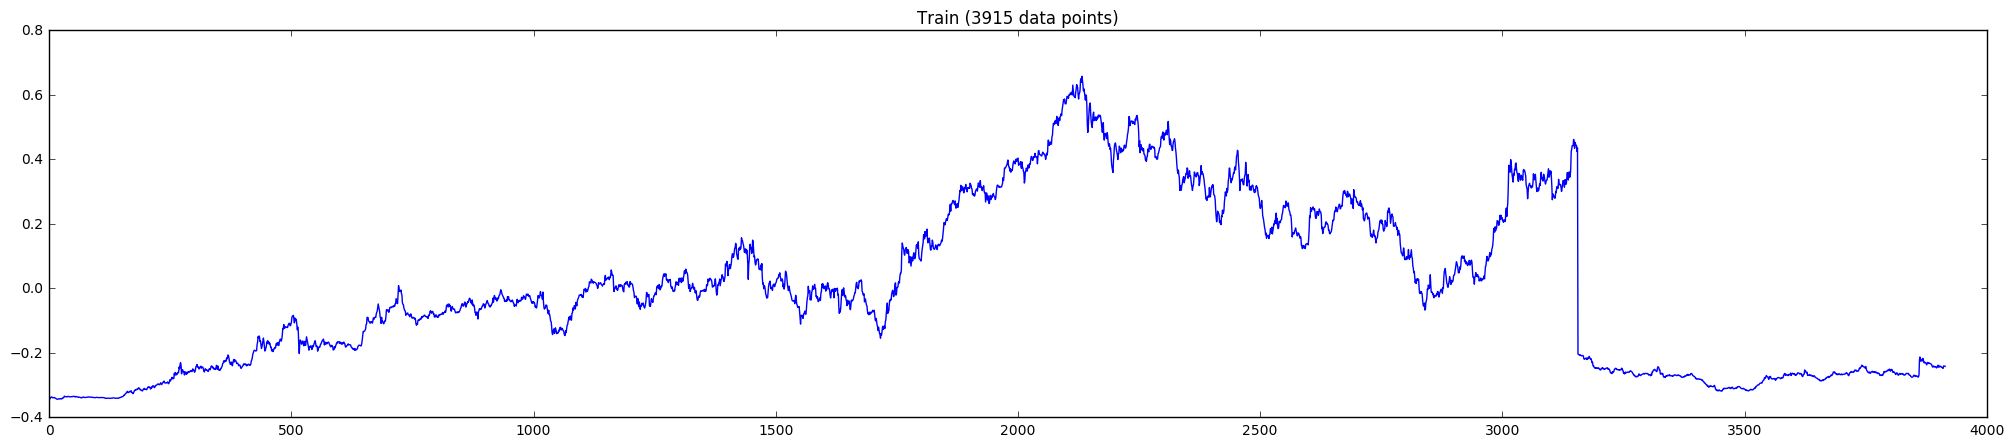

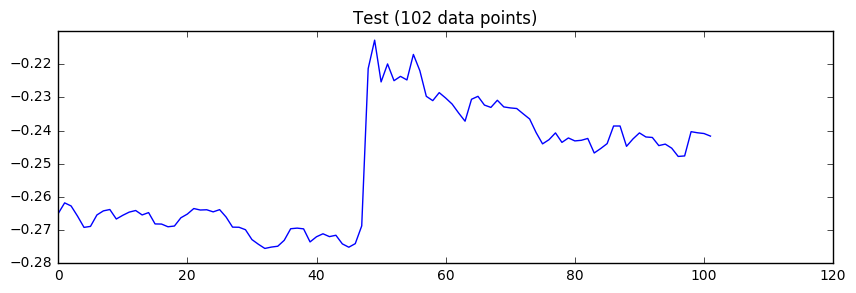

In [72]:
plt.figure(figsize=(25,5))
plt.plot(xTrain[:,0])
plt.title('Train (' +str(len(xTrain))+' data points)')
plt.show()
plt.figure(figsize=(10,3))
plt.plot(xTest[:,0])
plt.title('Test (' +str(len(xTest))+' data points)')
plt.show()

In [73]:
## Model

In [74]:
LEARNING_RATE = 0.001
BATCH_SIZE = 1

x = tf.placeholder(tf.float32,[None,num_features],name='x')
y = tf.placeholder(tf.float32,[None],name='y')
keep_prob = tf.placeholder(tf.float32,name='keep_prob')

In [75]:
#Layer1
WRelu1 = tf.Variable(tf.truncated_normal([num_features,num_features]),dtype=tf.float32,name='wrelu1')
bRelu1 = tf.Variable(tf.truncated_normal([num_features]),dtype=tf.float32,name='brelu1')
relu1 = tf.nn.elu(tf.matmul(x,WRelu1) + bRelu1,name='relu1')

#DROPOUT
relu1 = tf.nn.dropout(relu1,keep_prob=keep_prob,name='relu1drop')

#Layer2
WRelu2 = tf.Variable(tf.truncated_normal([num_features,num_features]),dtype=tf.float32,name='wrelu2')
bRelu2 = tf.Variable(tf.truncated_normal([num_features]),dtype=tf.float32,name='brelu2')
layer2 = tf.add(tf.add(tf.matmul(relu1,WRelu2),bRelu2),x,name='layer2')

relu2 = tf.nn.elu(layer2,name='relu2')

#Layer3
WRelu3 = tf.Variable(tf.truncated_normal([num_features,num_features]),dtype=tf.float32,name='wrelu3')
bRelu3 = tf.Variable(tf.truncated_normal([num_features]),dtype=tf.float32,name='brelu3')
relu3 = tf.nn.elu(tf.matmul(relu2,WRelu3) + bRelu3,name='relu3')


#DROPOUT
relu3 = tf.nn.dropout(relu3,keep_prob=keep_prob,name='relu3drop')

#Out layer
Wout = tf.Variable(tf.truncated_normal([num_features,1]),dtype=tf.float32,name='wout')
bout = tf.Variable(tf.truncated_normal([1]),dtype=tf.float32,name='bout')
logits = tf.add(tf.matmul(relu3,Wout),bout,name='logits')


#Predictions
pred = logits

#Cost & Optimizer
cost = tf.reduce_mean(tf.squared_difference(y, logits))
optimizer = tf.train.AdamOptimizer(LEARNING_RATE).minimize(cost)

In [84]:
def train_one_classifier(num_epochs,label_n):
    display_freq = num_epochs//10

    loss_list = []
    loss_list_batch = []

    with tf.Session() as sess:
        tf.global_variables_initializer().run()

        for step in range(num_epochs):
            print('Step: %d' %step)

            for batch_idx in range(num_batches):
                
                batchx = xTrain[batch_idx*BATCH_SIZE:batch_idx*BATCH_SIZE+BATCH_SIZE,:]
                batchy = yTrain[batch_idx*BATCH_SIZE:batch_idx*BATCH_SIZE+BATCH_SIZE].ravel()

                feed = {x: batchx, y: batchy, keep_prob:0.5}
                
                _,_loss = sess.run([optimizer,cost], feed_dict=feed)
                loss_list_batch.append(np.average(_loss)) #Store av. batch loss

            #Add the av. loss of the batch to the loss list
            loss_list.append(np.average(loss_list_batch))
            loss_list_batch = []
                        
            if(step%2 == 0):
                print('Initial loss: %.6f' % np.average(_loss))


        
        feed_dev = {x : xTest, y : yTest.ravel(), keep_prob:1}
        _y,_softmax,_pred = sess.run([y,logits,pred],feed_dict=feed_dev)
        
        acc_train = accuracy.eval(feed_dict={x: batchx, y: batchy, keep_prob:0.5})
        acc_test =  accuracy.eval(feed_dict={x : xTest, y : yTest.ravel(), keep_prob:1})
        
        print("Epoch:", step, "Train accuracy:", acc_train, "Test accuracy:", acc_test)
        
        

        
        #feed_test = {x : [[-0.241662,0.000630,0.290276,-0.017732]], y : [[yTest]].ravel(), keep_prob:1}
        #_y,_softmax,_pred = sess.run([y,logits,pred],feed_dict=feed_dev)
        
        print('Train finished - Final loss: %.3f' % (np.average(_loss)))
        
        save_path = saver.save(sess, "./single_layer_model.ckpt")
        
        
    return loss_list,_y,_pred

In [ ]:
loss_list,_y,_pred = train_one_classifier(num_epochs,1)

Step: 0
Initial loss: 0.058008
Step: 1
Step: 2
Initial loss: 0.000814
Step: 3
Step: 4
Initial loss: 0.004287
Step: 5
Step: 6
Initial loss: 0.000067
Step: 7
Step: 8
Initial loss: 0.000110
Step: 9
Step: 10
Initial loss: 0.001368
Step: 11
Step: 12
Initial loss: 0.000770
Step: 13
Step: 14
Initial loss: 0.000145
Step: 15
Step: 16
Initial loss: 0.000731
Step: 17
Step: 18
Initial loss: 0.000238
Step: 19
Step: 20
Initial loss: 0.001200
Step: 21
Step: 22
Initial loss: 0.000286
Step: 23
Step: 24
Initial loss: 0.001869
Step: 25
Step: 26
Initial loss: 0.000001
Step: 27
Step: 28
Initial loss: 0.000004
Step: 29
Step: 30
Initial loss: 0.000073
Step: 31
Step: 32
Initial loss: 0.002020
Step: 33
Step: 34
Initial loss: 0.002033
Step: 35
Step: 36
Initial loss: 0.000358
Step: 37
Step: 38
Initial loss: 0.000672
Step: 39
Step: 40
Initial loss: 0.000167
Step: 41
Step: 42
Initial loss: 0.000991
Step: 43
Step: 44
Initial loss: 0.000428
Step: 45
Step: 46
Initial loss: 0.000189
Step: 47
Step: 48
Initial loss: 0.0

In [ ]:
# Evaluate the single-layer neural network
with tf.Session() as sess:
    saver.restore(sess, "./single_layer_model.ckpt") 
    X_new_scaled = fash_data.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

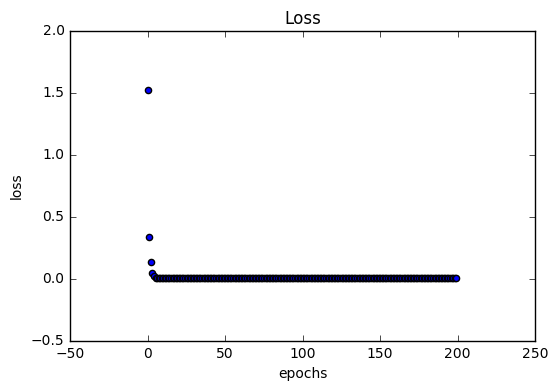

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Loss')
plt.scatter(x=np.arange(0,len(loss_list)),y=loss_list)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show();

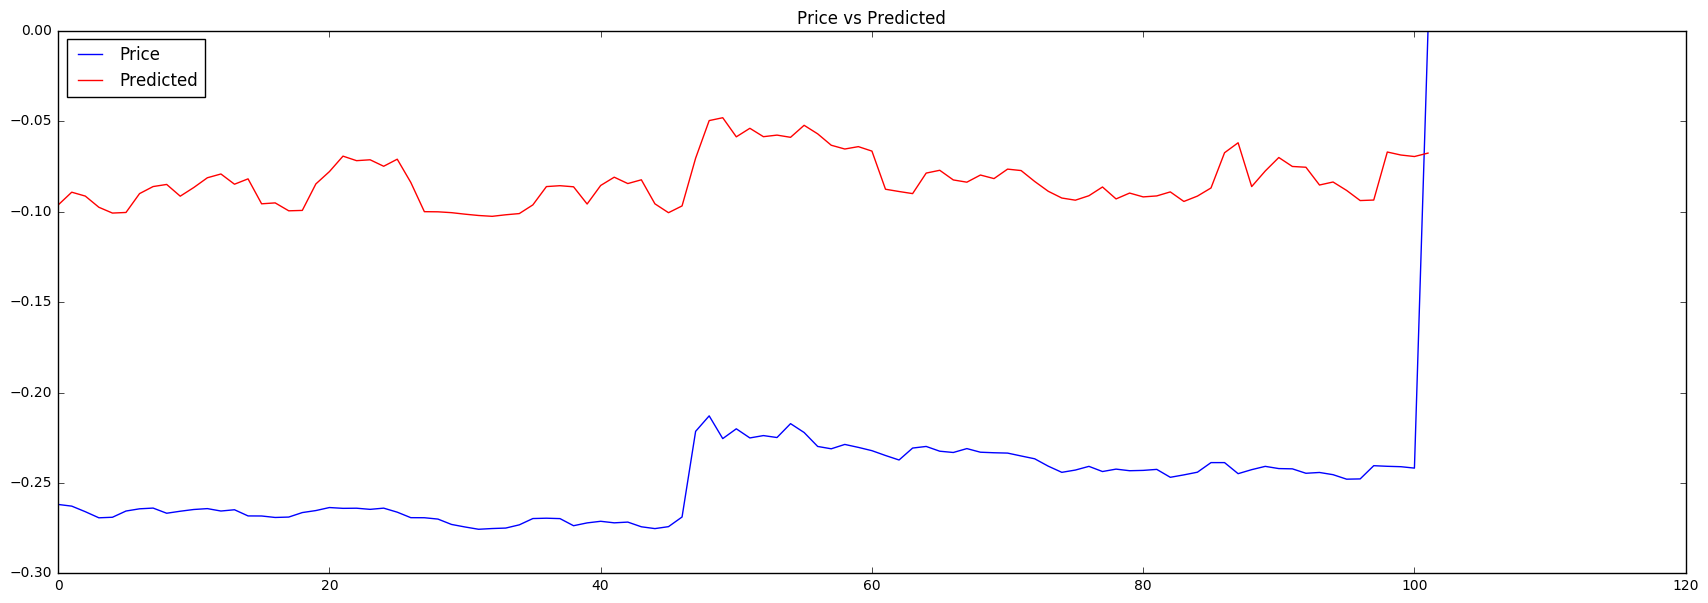

In [81]:
plt.figure(figsize=(21,7))
plt.plot(_y,label='Price',color='blue')
plt.plot(_pred.ravel(),label='Predicted',color='red')
plt.title('Price vs Predicted')
plt.legend(loc='upper left')
plt.show()

In [79]:
_pred

array([[-0.09622531],
       [-0.08917217],
       [-0.09132485],
       [-0.09750793],
       [-0.1007109 ],
       [-0.10038278],
       [-0.08994869],
       [-0.08605292],
       [-0.08488528],
       [-0.09137352],
       [-0.08657616],
       [-0.08118874],
       [-0.07909956],
       [-0.08476089],
       [-0.08179265],
       [-0.09559003],
       [-0.09508921],
       [-0.09946698],
       [-0.09924668],
       [-0.08459356],
       [-0.07777566],
       [-0.06923318],
       [-0.07173665],
       [-0.07124886],
       [-0.07482898],
       [-0.07092412],
       [-0.08377494],
       [-0.09994134],
       [-0.10001889],
       [-0.10048928],
       [-0.1013297 ],
       [-0.10205396],
       [-0.10251404],
       [-0.10166003],
       [-0.10099454],
       [-0.09618784],
       [-0.0860638 ],
       [-0.0855813 ],
       [-0.08618638],
       [-0.09570708],
       [-0.08544916],
       [-0.08087189],
       [-0.08439605],
       [-0.08231507],
       [-0.09561098],
       [-0